In [1]:
import pandas as pd

df = pd.read_csv("amazon_data.csv")
print(df.shape)
print(df.head())
print(df.info())


(354, 5)
                                        product_name  price  \
0  VOLTZ 6 TON Cargo Trolley with Handle 180 Degr...  7,498   
1  Nutronics CRA-8 Ton Cargo Trolley with Handle ...  7,699   
2  Nutronics CRA-6 Ton Cargo Trolley 180 Degree R...  4,999   
3  AGARO 26pcs Hex Allen Key Wrench Set - Inch/MM...    649   
4  ERH India 2 Pcs 16 Amp Roller Limit Switch 220...    158   

                seller_info              category  page  
0             FREE delivery  industrial machinery     1  
1  FREE deliveryFri, 29 Aug  industrial machinery     1  
2  FREE deliveryTue, 26 Aug  industrial machinery     1  
3  FREE deliverySun, 24 Aug  industrial machinery     1  
4   Buy 2 items, get 5% off  industrial machinery     1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  354 non-null    object
 1   price         336 non-null   

In [2]:
print(df['price'].describe())
print(df['product_name'].nunique())
print(df['seller_info'].value_counts().head(10))


count     336
unique    267
top       449
freq        9
Name: price, dtype: object
338
seller_info
FREE delivery3 - 6 Sept                                                     114
Up to 5% back with Amazon Pay ICICI cardUp to 5% back with Amazon Pay...     14
FREE deliverySat, 30 Aug                                                     13
FREE delivery15 - 18 Sept                                                     9
byJosé Luis Oliver Herrero                                                    8
byEditorial DataGroup                                                         8
2% off coupon appliedSave 2%with coupon                                       7
FREE deliveryWed, 27 Aug                                                      7
FREE delivery11 - 15 Sept                                                     6
Buy 2 items, get 5% off                                                       6
Name: count, dtype: int64


In [3]:
# Convert price to numeric
df['price'] = pd.to_numeric(df['price'].str.replace(',', ''), errors='coerce')

# Drop rows with missing price
df_clean = df.dropna(subset=['price'])

# Remove duplicates
df_clean = df_clean.drop_duplicates(subset=['product_name', 'seller_info'])

# Keep only valid sellers
df_clean = df_clean[df_clean['seller_info'].str.startswith('by', na=False)]


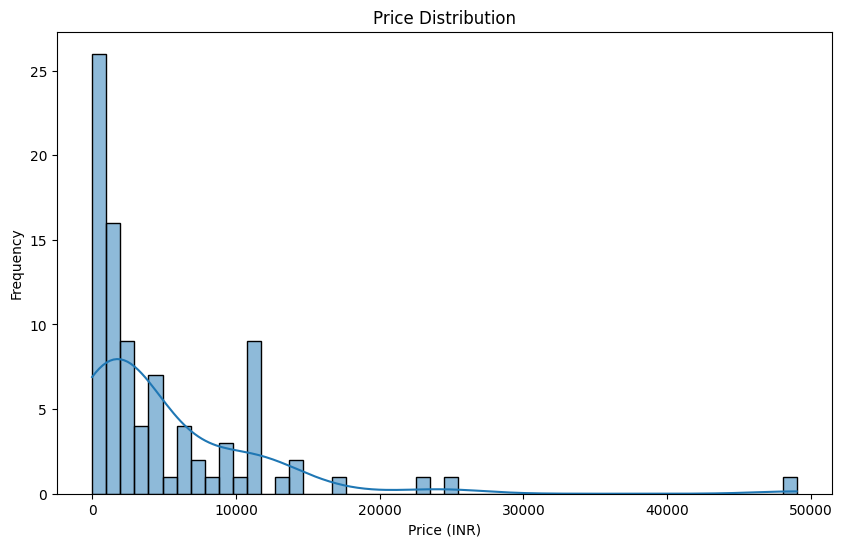

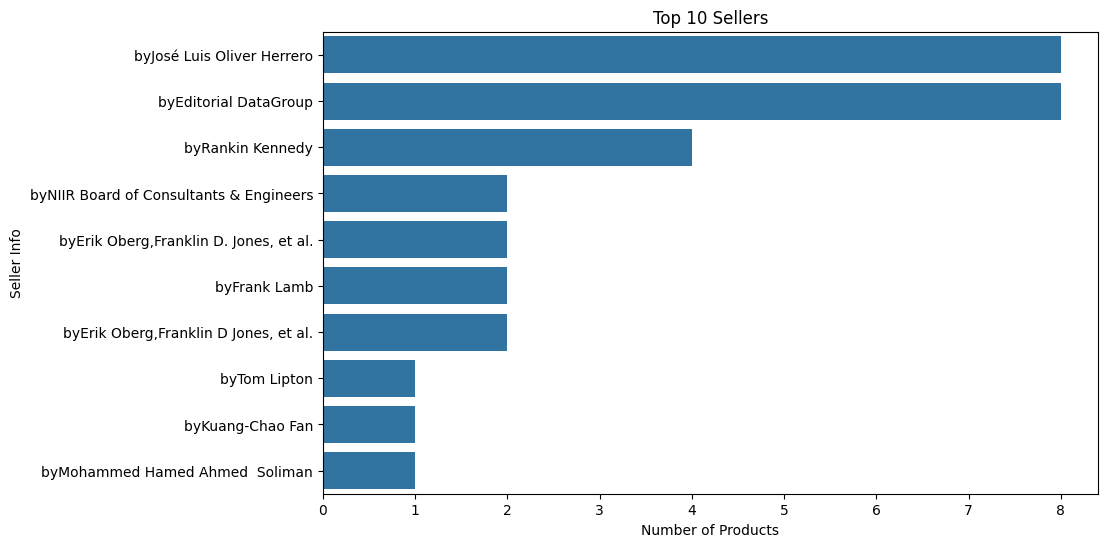

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()

# Top sellers
top_sellers = df_clean['seller_info'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_sellers.values, y=top_sellers.index)
plt.title("Top 10 Sellers")
plt.xlabel("Number of Products")
plt.ylabel("Seller Info")
plt.show()


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df_clean['product_name'])
keywords = vectorizer.get_feature_names_out()

print("🔑 Top Keywords:", keywords)


🔑 Top Keywords: ['applications' 'assembled' 'book' 'cad' 'complete' 'components' 'country'
 'cutting' 'design' 'edition' 'electric' 'electrical' 'equipment'
 'financials' 'guide' 'guides' 'handbook' 'industrial' 'industry'
 'installations' 'light' 'machinery' 'machines' 'maintenance' 'manual'
 'manufacturing' 'market' 'model' 'models' 'paper' 'parts' 'power'
 'printing' 'process' 'puredata' 'repair' 'revenues' 'revised' 'safety'
 'scale' 'science' 'summary' 'systems' 'technical' 'technology' 'traction'
 'values' 'virtual' 'vltm' 'world']


<Axes: title={'center': 'Price Segments'}, xlabel='price_segment'>

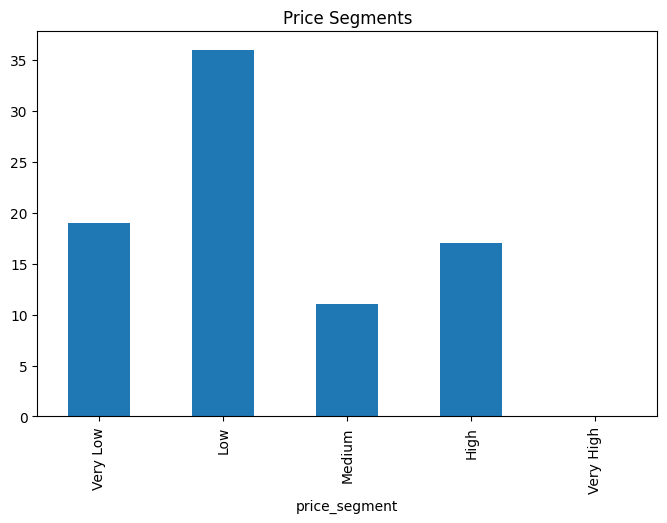

In [6]:
df_clean['price_segment'] = pd.cut(df_clean['price'], bins=[0, 1000, 5000, 10000, 50000, 100000], 
                                   labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

segment_counts = df_clean['price_segment'].value_counts().sort_index()
segment_counts.plot(kind='bar', title='Price Segments', figsize=(8,5))


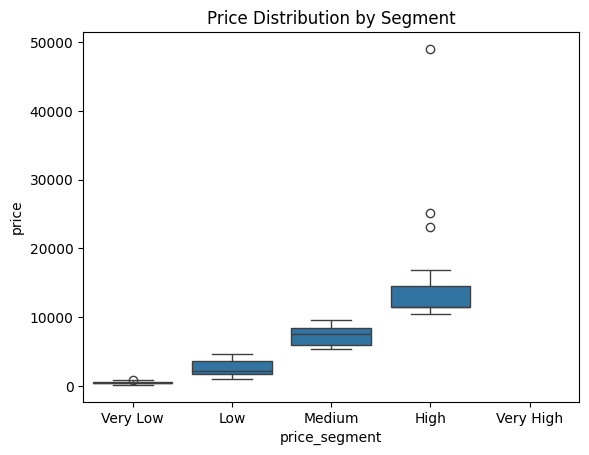

In [7]:
sns.boxplot(x='price_segment', y='price', data=df_clean)
plt.title("Price Distribution by Segment")
plt.show()


In [8]:
missing_price = df['price'].isna().sum()
invalid_sellers = df[~df['seller_info'].str.startswith('by', na=False)].shape[0]
duplicates = df.duplicated(subset=['product_name', 'seller_info']).sum()

print(f"⚠️ Missing prices: {missing_price}")
print(f"⚠️ Invalid sellers: {invalid_sellers}")
print(f"⚠️ Duplicate entries: {duplicates}")


⚠️ Missing prices: 18
⚠️ Invalid sellers: 252
⚠️ Duplicate entries: 14
